<a href="https://colab.research.google.com/github/rijuCr7/NLP/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Swarnadeep Bhar
#MCS201802
#Assignment 2

In [7]:
#import statements
import numpy as np 
import nltk
from nltk import bigrams
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('all')
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
import os
import string
from sklearn.decomposition import TruncatedSVD
from urllib import request

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [8]:
#Question 1
#Create a collocation Matrix and apply LSI on it
vocab=[]
corpus=[]

collocation_matrix = {}
vocabulary={}
#return the names of files in the dictionary
def get_files(dir_path):
    files = []
    for file in os.listdir(dir_path):
        files.append(file)
    return files

#check if the string is impure or not
def isImpure(word):
    flag = False
    for index in range(len(word)):
        if word[index] in string.punctuation:
            flag = True
        elif word[index].isdigit():
            flag = True
    return flag

def extract_words(text):
    text.translate(string.punctuation) 
    words = text.split()
    curr_words=[]
    for r in words: 
        if not r in stop_words:
            if not isImpure(r) and len(r) > 3:
                curr_words.append(r)
                vocabulary[r]=1
    return curr_words

def splitNumbersAndUnits(text):
    term_list = word_tokenize(text)
    #print(term_list)
    new_term = ""
    change_terms = {}
    problem = []
    pos = 0
    for term in term_list:
        if term[0].isdigit():
            #print(term)
            problem.append(term)
    for word in problem:
        for i in range(0,len(word)):
            #print(word[i])
            if not word[i].isdigit():
                pos = i
                #print(pos)
                break
        #print(word[:pos])
        #print(word[pos:])
        new_term = word[:pos] + " " + word[pos:]
        change_terms[word] = new_term
        #print(new_term)
    #print(change_terms)
    new_text = ""
    for term in term_list:
        if term in change_terms.keys():
            new_text = new_text + " " + change_terms[term]
        else:
            new_text = new_text + " " + term
    return new_text



def create_corpus(url_path):
    #files = get_files(url_path)
    for i in range(0,271):
        file = 'file'+str(i)+'.txt'
        url = url_path + file
        res = request.urlopen(url)
        file_content = res.read()
        file_content = file_content.decode('utf-8')
        file_content = splitNumbersAndUnits(file_content)
        words=extract_words(file_content)
        for word in words:
            corpus.append(word)
        #print(words,end=' ')
        #co_occurrence_matrix(file_content)

def make_co_occurrence_matrix(corpus):
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    # Loop through the bigrams in the frequency distribution, noting the 
    # current and previous word, and the number of occurrences of the bigram.
    # Get the vocab index of the current and previous words.
    # Put the number of occurrences into the appropriate element of the array.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count 

create_corpus("https://www.cmi.ac.in/~koustav/Assignment-1/")
#print(corpus)
for keys in vocabulary:
    vocab.append(keys)
#print(len(vocab))
vocab_to_index = { word:i for i, word in enumerate(vocab) }
#print(vocab_to_index)
co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
make_co_occurrence_matrix(corpus)
#print(co_occurrence_matrix)
#make svd
svd = TruncatedSVD(n_components=150, n_iter=7, random_state=42)
embeddings_matrix = svd.fit_transform(co_occurrence_matrix)
word_embeddings=pd.DataFrame(embeddings_matrix,index=vocab)
embedding = {}
for word in vocab:
    embedding[word] = word_embeddings.loc[ word , : ]

print(embedding)


{'airplane': 0      0.084037
1      0.272855
2      0.074467
3     -0.136789
4      0.119967
5     -0.239872
6      0.394440
7      0.076054
8      0.008898
9      0.084379
10    -0.174572
11     0.473293
12     0.431183
13     0.333403
14    -0.117973
15     0.379239
16    -0.363829
17    -0.284760
18     0.363245
19    -0.248285
20     0.173223
21    -0.192198
22     0.212626
23    -0.086980
24    -0.137199
25     0.394496
26     0.072427
27     0.120419
28    -0.164054
29     0.223073
         ...   
120    0.026950
121    0.042281
122    0.065829
123   -0.135329
124   -0.042347
125    0.045325
126   -0.051699
127    0.065824
128    0.015672
129   -0.129251
130   -0.031180
131   -0.054630
132   -0.013103
133    0.078838
134   -0.078505
135   -0.000410
136   -0.058304
137    0.005870
138    0.132060
139   -0.029605
140   -0.038385
141    0.017085
142   -0.061801
143   -0.114909
144   -0.061239
145    0.012784
146   -0.007319
147    0.038935
148   -0.092804
149    0.101525
Name: airpl

In [0]:
#Question 2
#Apply Word2Vec on the same corpus


In [0]:
#import statements
from sklearn.decomposition import PCA
from matplotlib import pyplot
from gensim.models import Word2Vec


150
{'airplane': array([ 0.01520397, -0.08265635,  0.01234448, -0.04101218,  0.16684611,
       -0.10246226, -0.02824275,  0.04851591,  0.0139606 ,  0.03508173,
        0.14413695,  0.15504625, -0.00914359,  0.18186529,  0.01247877,
        0.06387701, -0.01676004,  0.06197842, -0.03110761,  0.07382869,
       -0.24007726,  0.00696258,  0.00221345,  0.03342541,  0.11232074,
        0.10693546,  0.08914483, -0.06776358,  0.00740824,  0.01990322,
        0.03288947, -0.199562  ,  0.00138555,  0.06421207,  0.1446585 ,
       -0.03732423,  0.07636079, -0.17789377, -0.00966192, -0.15515809,
        0.13163242, -0.1612365 ,  0.1309734 , -0.0671235 , -0.11170794,
        0.06312018,  0.16819166,  0.04294476, -0.03725971, -0.1578183 ,
       -0.07610817,  0.07125928,  0.0837166 ,  0.14659365, -0.01738482,
       -0.02056148, -0.05896374,  0.03899008, -0.05040192, -0.12529242,
        0.00597611, -0.04468722,  0.03914741,  0.04349836, -0.06411143,
       -0.1645774 ,  0.12434753,  0.13055663,  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:100: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


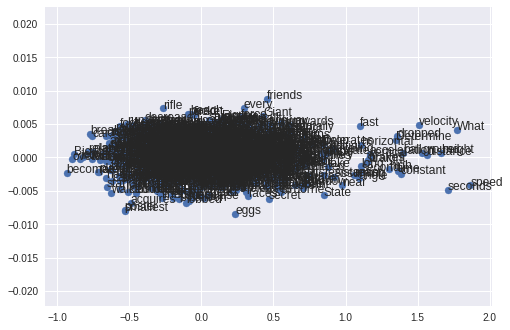

In [10]:
#check if the string is impure or not
def isImpure(word):
    flag = False
    for index in range(len(word)):
        if word[0] in string.punctuation:
            flag=True
        if word[index].isdigit():
            flag = True
    return flag

vocab = []

def extract_words(text,unique_words):
    text.translate(string.punctuation) 
    words = text.split() 
    for r in words: 
        if not r in stop_words:
            if not isImpure(r) and len(r) > 3:
                unique_words[r] = 0


def splitNumbersAndUnits(text):
    term_list = word_tokenize(text)
    #print(term_list)
    new_term = ""
    change_terms = {}
    problem = []
    pos = 0
    for term in term_list:
        if term[0].isdigit():
            #print(term)
            problem.append(term)
    for word in problem:
        for i in range(0,len(word)):
            #print(word[i])
            if not word[i].isdigit():
                pos = i
                #print(pos)
                break
        #print(word[:pos])
        #print(word[pos:])
        new_term = word[:pos] + " " + word[pos:]
        change_terms[word] = new_term
        #print(new_term)
    #print(change_terms)
    new_text = ""
    for term in term_list:
        if term in change_terms.keys():
            new_text = new_text + " " + change_terms[term]
        else:
            new_text = new_text + " " + term
    return new_text
unique={}
def create_corpus_to_pass(url_path):
    #sentences = []
    vocab = []
    unique_words = {}
    for i in range(0,271):
        file = 'file'+str(i)+'.txt'
        url = url_path + file
        res = request.urlopen(url)
        file_content = res.read()
        file_content = file_content.decode('utf-8')
        file_content = splitNumbersAndUnits(file_content)
        extract_words(file_content,unique_words)
        for keys in unique_words.keys():
            unique[keys]=keys
            vocab.append(keys)
        sentences.append(vocab)
        unique_words = {}
        vocab = []
        #print(sentences)


#print(sentences)
sentences=[]
create_corpus_to_pass("https://www.cmi.ac.in/~koustav/Assignment-1/")
#print(sentences)
#cores = multiprocessing.cpu_count() # Count the number of cores in a computer
w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=150,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=10)
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
print(len(w2v_model.wv['actually']))
embeddings={}
for sentence in sentences:
    for word in sentence:
        embeddings[word]=w2v_model.wv[word]
#print(embeddings.keys())
print(embeddings)
print(w2v_model.similarity('speed','velocity'))
#0.99993336 - speed velocity distance
#0.9999278 - speed actually  distance

X = w2v_model[w2v_model.wv.vocab]
pca = PCA(n_components=3)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(w2v_model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

pyplot.show()


#Question-3
Click on the link below to see Question 3

https://drive.google.com/open?id=1wE8Kvr9fMY0X_H0WcxxKfyaTAI51MCLh

The reference fo the answer is taken from the following paper

"Neural Word Embedding
as Implicit Matrix Factorization"
-
Omer Levy
Yoav Goldberg

https://drive.google.com/open?id=10BNUhTAe-I_I8MycapkN4SXiNF2n1r2G



# Question-4

The naive LSI matrix does not take into account  the contextual meaning of the words,the term document matrix only captures the counts of words occuring in each document.The context is thus ignored,thus the words that occur in similar type of documents come together in the vector embedding.
However, Word2Vec keeps into account the contextual meaning of the words,as the two models it is based on,the Skip-Gram and the CBOW model both try to embed the words in such a way such as the contextual meaning gets captured.Each word vector is a combination of its contextual words.Hence,we should get two represantation of the word 'APPLE' one for the fruit and another for the company.
Now if we improve the LSI matrix by replacing the columns with terms,i.e we have a term-term cooccurance matrix.The co occurance matrix now captures some contextual meaning of the words.
Now when SVD is performed, it rotates the axes with maximum variance in decreasing order.
We can identify it with the eigen values which come in the middle matrix.The top most significant eigen values are kept while the rest dropped.The rows of the converted matrix are now used as embeddings for the words.Each word can now be said to have captured some information about its context. The three matrices into which the co occurance matrix is decomposed can be thought as such:
The first matrix contains the word vectors
The second matrix contains the eigen values,it is a triangular matrix
The third matrix again contains the term vectors but they are the context word vectors
The third matrx can be said to contain the embeddings for the terms when they appear as contexts.
Thus the LSI word vectors can be thought to be somewhat similar to the Word2Vec word vectors.